In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
df=pd.read_excel("/content/decision_tree.xlsx")
df

,Days,outlook,temperature,routine,wearjacket
0,1,sunny,cold,indoor,no
1,2,sunny,warm,outdoor,no
2,3,cloudy,warm,indoor,no
3,4,sunny,warm,indoor,no
4,5,cloudy,cold,indoor,yes
5,6,cloudy,cold,outdoor,yes
6,7,sunny,cold,outdoor,yes


In [73]:
y=df['wearjacket']

In [74]:
y.head()

0     no
1     no
2     no
3     no
4    yes
Name: wearjacket, dtype: object

In [75]:
df=df.drop('   Days',axis=1)

In [76]:
df.head()

,outlook,temperature,routine,wearjacket
0,sunny,cold,indoor,no
1,sunny,warm,outdoor,no
2,cloudy,warm,indoor,no
3,sunny,warm,indoor,no
4,cloudy,cold,indoor,yes


In [77]:
x=df.drop('wearjacket',axis=1)

In [78]:
x.head()

,outlook,temperature,routine
0,sunny,cold,indoor
1,sunny,warm,outdoor
2,cloudy,warm,indoor
3,sunny,warm,indoor
4,cloudy,cold,indoor


#Decision tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()

#preprocessing lavel encoding

In [80]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [81]:
x.outlook=le.fit_transform(df['outlook'])

In [82]:
x.head()

,outlook,temperature,routine
0,1,cold,indoor
1,1,warm,outdoor
2,0,warm,indoor
3,1,warm,indoor
4,0,cold,indoor


In [83]:
x.temperature=le.fit_transform(df['temperature'])
x.head()

,outlook,temperature,routine
0,1,0,indoor
1,1,1,outdoor
2,0,1,indoor
3,1,1,indoor
4,0,0,indoor


In [84]:
x.routine=le.fit_transform(df['routine'])
x.head()

,outlook,temperature,routine
0,1,0,0
1,1,1,1
2,0,1,0
3,1,1,0
4,0,0,0


In [85]:
dc.fit(x,y)

DecisionTreeClassifier()

In [89]:
dc.predict([[1,1,0]]) # 1=sunny 1=warm 0 =indoor

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['no'], dtype=object)

In [90]:
dc.predict([[1,0,1]]) # 1=sunny 0=warm 1=outdoor

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['yes'], dtype=object)

[Text(0.6666666666666666, 0.875, 'temperature <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.5, 0.625, 'routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.375, 'outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

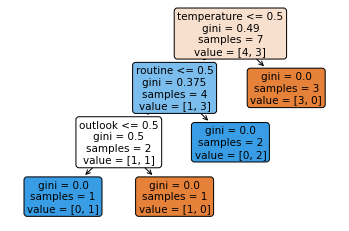

In [93]:
from sklearn import tree
tree.plot_tree(dc,filled=True,rounded=True,feature_names=x.columns)